In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Drawing random numbers in Python

## 1. Drawing using the rectangular distribution

The prerequisite for drawing from a probability distribution is the ability to draw randomly from the rectangular or uniform distribution on $(0,1)$.

For any other distribution, draws can be generated by

  1) draw $\xi$ randomly from the uniform distribution

  2) evaluate the inverse cumulative distribution function $G^{-1}(x)$ at $\xi$

### Implementation in Python

Uniform numbers in Python are drawn by
``` python
    import numpy as np
    xi = np.random.rand(size)
```
Standard normally distributed values
```python
    xi = np.random.randn(size)
```

#### Example

```python
    import numpy as np
    np.random.randn(100)
    np.random.rand(100,10)
```

Probability distributions are implemented in _scipy_ with inverse cumulative distributions being implemented as **ppf** for the individual probability distributions:
``` python
    import scipy.stats as stats
    # normal distribution
    stats.norm.ppf(q, loc = 0, scale = 1)   
    # gamma distribution
    stats.gamma.ppf(q, a, loc = 0, scale = 1)
    # t-distribution
    stats.t.ppf(q, dof, loc = 0, scale = 1) 
    # poisson distribution
    stats.poisson.ppf(q, mu, loc = 0)       
```

### Exercise 1.1

Using the rectangular distribution, draw 1000 random numbers from 
- normal distribution with mean $mu=0.2$ and standard deviation $\sigma=0.1$
- gamma distribution with shape parameter $a=2.5$ and scale parameter $s=0.2$
- t-distribution with 5 degrees of freedom, located around $3.5$ and with scale $s=0.8$

Plot a histogram for each outcome.

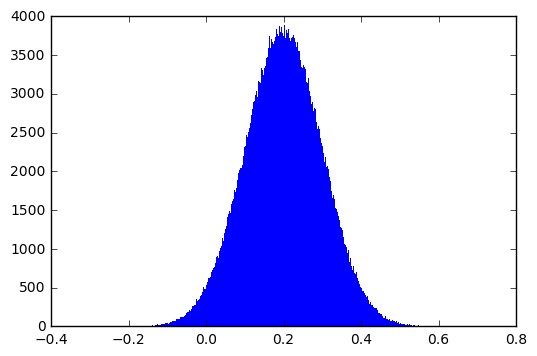

In [3]:
from numpy.random import rand
import scipy.stats as stats
q = rand(1000000)

vals = stats.norm.ppf(q, loc=0.2, scale=0.1)

hist(vals, bins = 1000, edgecolor="none");

## 2. Drawing using the built-in generator functions

The **scipy.stats** package provides over 90 different probability distributions, each with its own random number generating function.

The basic usage is

1) Import the **scipy.stats** package
``` python
    import scipy.stats as stats
```


2) Call the **rvs** function of the sought probalitity distribution with size as keyword argument
``` python
    xi = stats.norm.rvs(size=1000)
    xi = stats.gamma.rvs(a, size=1000)
    xi = stats.t.rvs(dof, size=1000)
```



The optional keyword parameters for each distribution correspond to those of the call for the inverse cumulative distribution function.

### Exercise 1.2

Repeat the random number generation from Exercise 1.1, but now use the built-in **rvs** function for each example.

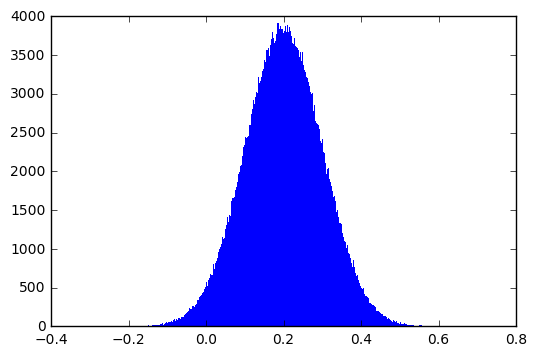

In [4]:
# normal distribution
nxi = stats.norm.rvs(loc = 0.2, scale = 0.1, size = 1000000)
figure(1)
hist(nxi, bins=1000, edgecolor="none");

### Curvilinear trapezoidal distribution

To sample from CTrap(a, b, d), make two draws $r_1$ and $r_2$ independently from the standard rectangular distribution $R(0, 1)$ and form 
$$ a_s = (a − d) + 2dr_1 \qquad b_s = (a+b)-a_s , $$
and
$$ \xi = a_s + (b_s − a_s)r_2 . $$

In this way $a_s$ is a draw from the rectangular distribution with limits $a \pm d$. $b_s$ is then formed to ensure that the midpoint of $a_s$ and $b_s$ is the prescribed value $x = (a + b)/2$.







### Task

A certiﬁcate states that a voltage X lies in the interval 10.0 V ± 0.1 V. No other information is available concerning X, except that it is believed that the magnitude of the interval endpoints is the result of rounding correctly some numerical value. On this basis, that numerical value lies between 0.05 V and 0.15 V, since the numerical value of every point in the interval (0.05, 0.15) rounded to one signiﬁcant decimal digit is 0.1. The location of the interval can therefore be regarded as ﬁxed, whereas its width is inexact. The best estimate of X is x = 10.0 V. 

Based on a = 9.9 V, b = 10.1 V and d = 0.05 V, sample from the PDF and calculate the best estimate and the associated uncertainty. 

In [ ]:
a = 9.9
b = 10.1
d = 0.05

MCruns = 1000000
r1 = random.rand(MCruns)
r2 = random.rand(MCruns)
a_s = (a-d) + 2*d*r1
b_s = (a+b) - a_s

xi = a_s + (b_s-a_s)*r2

estimate = 10	uncertainty = 0.0599838


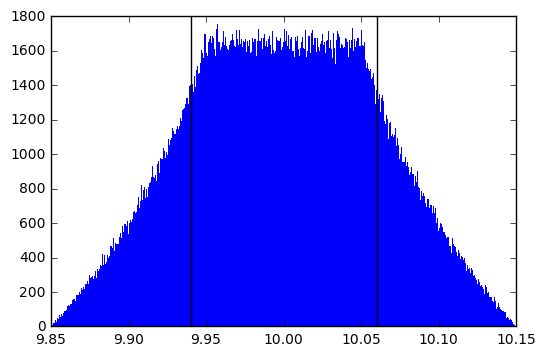

In [4]:
hist(xi, bins = MCruns//1000, edgecolor="none");

x = xi.mean()
ux = xi.std()

print("estimate = %g\tuncertainty = %g"%(x, ux))
axvline(x-ux,color="k");
axvline(x+ux,color="k");